In [1]:
using DelimitedFiles, HDF5, FileIO
using Plots, Rsvg, LaTeXStrings, StatPlots
using Chemfiles, JUMD
using LinearAlgebra, Statistics
home = "/home/pbarletta/labo/18/lbp/run"
rtdos = "/home/pbarletta/labo/18/lbp/rtdos_log"
pyplot()

┌ Info: Precompiling StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1189


Plots.PyPlotBackend()

## Energías

In [15]:
function get_vgv(id)
    modes = Symbol("modes_", id)
    evals = Symbol("evals_", id)
    vol_avg = Symbol("vol_avg_", id)
    vol_ndd = Symbol("vol_ndd_", id)
    vgv = Symbol("vgv_", id)
    
    # Leo modos
    @eval $modes, $evals = JUMD.readPtrajModes(joinpath(home, string($id),  "pca",
        string("modes_", string($id))))
    # Leo volumen original
    @eval $vol_avg = convert(Float64, readdlm(joinpath(home, string($id),  "ndd",
        string("vol_avg_", string($id))))[3])
    # Leo volúmenes NDD
    @eval $vol_ndd = convert(Array{Float64, 1},
        readdlm(joinpath(home, string($id),  "ndd", string("out_ndd_", string($id))))[2:end, 2])
    # VGV
    @eval ($vgv = ($vol_ndd .- $vol_avg) .* $evals)
    @eval ($vgv = $vgv ./ norm($vgv))
end

get_vgv("1ure");
get_vgv("2w9y");
get_vgv("4uet");
get_vgv("4xcp");
get_vgv("1ifb");
get_vgv("2ifb");

pasos = collect(-.8:.05:.8)
npasos = length(pasos)
RT = 0.693

E_1ure = Array{Float64,1}(undef, npasos)
[ E_1ure[i] = JUMD.energiaGdte(evals_1ure, vgv_1ure, pasos[i]) for i in 1:npasos ]
        
E_2w9y = Array{Float64,1}(undef, npasos)
[ E_2w9y[i] = JUMD.energiaGdte(evals_2w9y, vgv_2w9y, pasos[i]) for i in 1:npasos ]

E_4uet = Array{Float64,1}(undef, npasos)
[ E_4uet[i] = JUMD.energiaGdte(evals_4uet, vgv_4uet, pasos[i]) for i in 1:npasos ]

E_4xcp = Array{Float64,1}(undef, npasos)
[ E_4xcp[i] = JUMD.energiaGdte(evals_4xcp, vgv_4xcp, pasos[i]) for i in 1:npasos ]

E_1ifb = Array{Float64, 1}(undef, npasos)
[ E_1ifb[i] = JUMD.energiaGdte(evals_1ifb, vgv_1ifb, pasos[i]) for i in 1:npasos]

E_2ifb = Array{Float64, 1}(undef, npasos)
[ E_2ifb[i] = JUMD.energiaGdte(evals_2ifb, vgv_2ifb, pasos[i]) for i in 1:npasos];

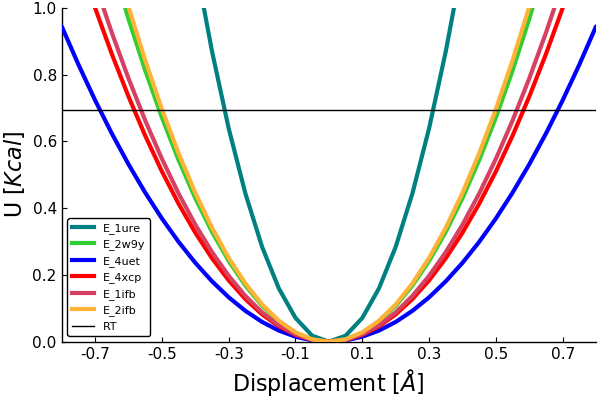

In [16]:
plt_u = plot(pasos, E_1ure, lab = "E_1ure",
    xticks = -.7:.2:.7, yticks = 0:.2:1.,   
    xlims = (-.8, .8), ylims = (0, 1.),
    guidefont = font(16, "Helvetica"), tickfont = font(11, "Helvetica"),
    yaxis = L"U $[Kcal]$", xaxis = L"Displacement $[\AA]$ ",
    linecolor = Colors.colorant"#008080", linewidth = 3,
    grid = false)

plot!(plt_u, pasos, E_2w9y, lab = "E_2w9y",
    linecolor = Colors.colorant"#32CD32", linewidth = 3)
plot!(plt_u, pasos, E_4uet, lab = "E_4uet",
    linecolor = Colors.colorant"#0000FF", linewidth = 3)

plot!(plt_u, pasos, E_4xcp, lab = "E_4xcp",
    linecolor = Colors.colorant"#FF0000", linewidth = 3)
plot!(plt_u, pasos, E_1ifb, lab = "E_1ifb",
    linecolor = Colors.colorant"#d64161", linewidth = 3)
plot!(plt_u, pasos, E_2ifb, lab = "E_2ifb",
    linecolor = Colors.colorant"#feb236", linewidth = 3)
hline!(plt_u, [RT], lab = "RT", linecolor = Colors.colorant"black")

In [17]:
savefig(plt_u, joinpath(rtdos, "papel", "7", string("7_U", ".svg")))

## Volumen

In [60]:
trj_vol_1ure = convert(Array{Float64, 1},
    readdlm(joinpath(home, "1ure", "cavidad", string("vol_trj_1ure")))[:, 3]);
trj_vol_2w9y = convert(Array{Float64, 1},
    readdlm(joinpath(home, "2w9y", "cavidad", string("vol_trj_2w9y")))[:, 3]);
trj_vol_4uet = convert(Array{Float64, 1}, 
    readdlm(joinpath(home, "4uet", "cavidad", string("vol_trj_4uet")))[:, 3]);
trj_vol_4xcp = convert(Array{Float64, 1}, 
    readdlm(joinpath(home, "4xcp", "cavidad", string("vol_trj_4xcp")))[:, 3]);
trj_vol_1ifb = convert(Array{Float64, 1},
    readdlm(joinpath(home, "1ifb", "cavidad", string("vol_trj_1ifb")))[:, 3]);
trj_vol_2ifb = convert(Array{Float64, 1},
    readdlm(joinpath(home, "2ifb", "cavidad", string("vol_trj_2ifb")))[:, 3]);

wgh_vol = fill(1.0, length(trj_vol_1ure))

# Histograma ponderado
Wbins_vol_1ure, Whis_vol_1ure = JUMD.weightedHist(trj_vol_1ure,
    collect(800:20:1500), wgh_vol, true, false);

Wbins_vol_2w9y, Whis_vol_2w9y = JUMD.weightedHist(trj_vol_2w9y,
    collect(200:20:800), wgh_vol, true, false);

Wbins_vol_4uet, Whis_vol_4uet = JUMD.weightedHist(trj_vol_4uet,
    collect(700:40:2200), wgh_vol, true, false);

Wbins_vol_4xcp, Whis_vol_4xcp = JUMD.weightedHist(trj_vol_4xcp,
    collect(700:40:2200), wgh_vol, true, false);

Wbins_vol_1ifb, Whis_vol_1ifb = JUMD.weightedHist(trj_vol_1ifb,
    collect(200:30:1200), wgh_vol, true, false);

Wbins_vol_2ifb, Whis_vol_2ifb = JUMD.weightedHist(trj_vol_2ifb,
    collect(600:20:1200), wgh_vol, true, false);

In [94]:
bar_vol_1ure = bar(Wbins_vol_1ure, Whis_vol_1ure,
    xlims = (250, 2200), ylims = (0, .1),
    xticks = 500:1000:2200,
    linecolor = false, fillcolor = Colors.colorant"#008080",
    grid = false, legend = false, title = "1URE",
    guidefont = font(11, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ");

bar_vol_2w9y = bar(Wbins_vol_2w9y, Whis_vol_2w9y,
    xlims = (250, 2200), ylims = (0, .1),
    xticks = 500:1000:2200,
    linecolor = false, fillcolor = Colors.colorant"#32CD32",
    grid = false, legend = false, title = "2W9Y",
    guidefont = font(11, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ");

bar_vol_4uet = bar(Wbins_vol_4uet, Whis_vol_4uet,
    xlims = (250, 2200), ylims = (0, .1),
    xticks = 500:1000:2200,
    linecolor = false, fillcolor = Colors.colorant"#0000FF",
    grid = false, legend = false, title = "4UET",
    guidefont = font(11, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ")

bar_vol_4xcp = bar(Wbins_vol_4xcp, Whis_vol_4xcp,
    xlims = (250, 2200), ylims = (0, .1),
    xticks = 500:1000:2200,
    linecolor = false, fillcolor = Colors.colorant"#FF0000",
    grid = false, legend = false, title = "4XCP",
    guidefont = font(11, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ")

bar_vol_1ifb = bar(Wbins_vol_1ifb, Whis_vol_1ifb,
    xlims = (250, 2200), ylims = (0, .1),
    xticks = 500:1000:2200,
    linecolor = false, fillcolor = Colors.colorant"#0000FF",
    grid = false, legend = false, title = "1IFB",
    guidefont = font(11, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ")

bar_vol_2ifb = bar(Wbins_vol_2ifb, Whis_vol_2ifb,
    xlims = (250, 2200), ylims = (0, .1),
    xticks = 500:1000:2200,
    linecolor = false, fillcolor = Colors.colorant"#FF0000",
    grid = false, legend = false, title = "2IFB",
    guidefont = font(11, "Arial"), tickfont = font(11, "Arial"),
    yaxis = "Density", xaxis = L"Volume $[\AA^3]$ ");

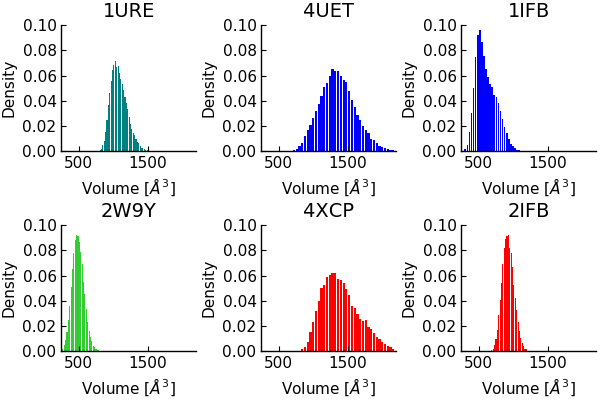

In [95]:
plt_vol_all = pregelot(bar_vol_1ure, bar_vol_4uet, bar_vol_1ifb,
    bar_vol_2w9y, bar_vol_4xcp, bar_vol_2ifb, layout = 6)

In [97]:
savefig(plt_vol_all, joinpath(rtdos, "papel", "1", string("vol_all.svg")))